# Análisis Exploratorio de los Datos
Notebook para hacer un análisis exploratorio de los datos

## Leyendo datos

In [1]:
# librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# leyendo datos
df_ext = pd.read_csv("./data/remaining_behavior_ext.csv")
df_sup = pd.read_csv("./data/supervised_dataset.csv", index_col=0)

### Descripción de las variables
Se usan los datos sup.

In [4]:
df_sup.dtypes

inter_api_access_duration(sec)    float64
api_access_uniqueness             float64
sequence_length(count)            float64
vsession_duration(min)              int64
ip_type                            object
num_sessions                      float64
num_users                         float64
num_unique_apis                   float64
source                             object
classification                     object
dtype: object

### Diccionario de los datos
- **inter_api_access_duration(sec):** Intervalo de tiempo entre dos accesos consecutivos a la API en una sesión de usuario.
- **api_access_uniqueness:** La proporción del número de APIs distintas vistas en una sesión de un usuario con respecto al total de llamadas hechas a la API en esa sesión.
- **sequence_length(count):** El número total de llamadas a API hechas en una sesión por una usuario en promedio.
- **vsession_duration(min):** La duración de una sesión de usuario dentro de una ventana de observación en minutos.
- **ip_type:** El tipo de IP de donde proviene el usuario.
- **num_sessions:** Número de sesiones de usuario cada una con diferente session_id.
- **num_users:** Número de usuarios generando el mismo tipo de secuencias de llamadas de API.
- **num_unique_apis:** Número de APIs distintas en ese grupo de comportamiento (behavior group).
- **source:** Origen de los datos. F = Financial services, E = Ecommerce.
- **classification:** Clasificación, outlier o normal.

In [5]:
# cambiando la variable vsession_duration a segundos para que sea comparable
df_sup.rename(
    columns={"vsession_duration(min)": "vsession_duration(sec)" }, 
    inplace=True
)
df_sup['vsession_duration(sec)'] = df_sup['vsession_duration(sec)'] * 60

In [6]:
# categorizando las variables de categoria
for col in ['ip_type', 'source', 'classification']:
    df_sup[col] = df_sup[col].astype('category')
df_sup.dtypes

inter_api_access_duration(sec)     float64
api_access_uniqueness              float64
sequence_length(count)             float64
vsession_duration(sec)               int64
ip_type                           category
num_sessions                       float64
num_users                          float64
num_unique_apis                    float64
source                            category
classification                    category
dtype: object

In [7]:
# descripción de las características numéricas
df_sup.describe()

inter_api_access_duration(sec)  api_access_uniqueness  \
count                     1560.000000            1560.000000   
mean                         0.858996               0.153479   
std                          4.875142               0.275511   
min                          0.000003               0.001200   
25%                          0.000638               0.008701   
50%                          0.001831               0.016063   
75%                          0.015128               0.137941   
max                         84.045074               1.000000   

       sequence_length(count)  vsession_duration(sec)  num_sessions  \
count             1560.000000            1.560000e+03   1560.000000   
mean                58.215141            3.778570e+05    614.283333   
std                185.849968            2.908284e+06   1219.123408   
min                  2.000000            6.000000e+01      2.000000   
25%                 10.183704            4.245000e+03     13.000000   
50%                 17.000000            1.161000e+04    187.000000   
75%                 38.331612            2.406450e+05    531.000000   
max               3303.000000            8.117688e+07   9299.000000   

         num_users  num_unique_apis  
count  1560.000000      1560.000000  
mean    442.373718        72.175000  
std     994.647978        83.891631  
min       1.000000         1.000000  
25%       1.000000        16.000000  
50%     155.000000        42.000000  
75%     356.250000        97.000000  
max    8447.000000       524.000000

In [8]:
# No hay valores perdidos
df_sup.isna().sum()

inter_api_access_duration(sec)    0
api_access_uniqueness             0
sequence_length(count)            0
vsession_duration(sec)            0
ip_type                           0
num_sessions                      0
num_users                         0
num_unique_apis                   0
source                            0
classification                    0
dtype: int64

In [9]:
# se retiran los valores duplicados
df_sup.duplicated().sum()

26

In [10]:
df_sup = df_sup.drop_duplicates()
df_sup.duplicated().sum()

0

### Visualizaciones

In [11]:
# dataframe con solo columnas numericas
df_sup_num = df_sup.drop(['ip_type','source', 'classification'], axis=1)

In [12]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df_sup, title="Pandas Profiling Report")

In [13]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

No se observa normalidad en las columnas numéricas, por lo que no sirviría el método de curva elíptica.

Veamos primero un par de interacciones de variables.

<AxesSubplot:xlabel='num_users', ylabel='num_sessions'>

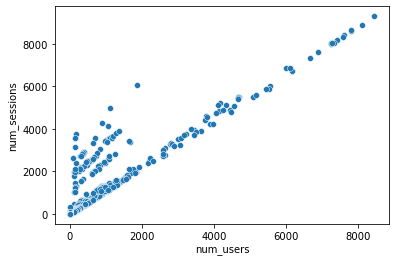

In [14]:
# numero de usuarios vs numero de sesion
sns.scatterplot(data=df_sup_num, x = 'num_users', y = 'num_sessions')

In [15]:
df_sup_num.head()

inter_api_access_duration(sec)  api_access_uniqueness  \
0                        0.000812               0.004066   
1                        0.000063               0.002211   
2                        0.004481               0.015324   
3                        0.017837               0.014974   
4                        0.000797               0.006056   

   sequence_length(count)  vsession_duration(sec)  num_sessions  num_users  \
0               85.643243                  324300        1460.0     1295.0   
1               16.166805                   31140        9299.0     8447.0   
2               99.573276                  372660         255.0      232.0   
3               69.792793                  497520         195.0      111.0   
4               14.952756                   10920         272.0      254.0   

   num_unique_apis  
0            451.0  
1            302.0  
2            354.0  
3            116.0  
4             23.0

In [16]:
df_sup_num.dtypes

inter_api_access_duration(sec)    float64
api_access_uniqueness             float64
sequence_length(count)            float64
vsession_duration(sec)              int64
num_sessions                      float64
num_users                         float64
num_unique_apis                   float64
dtype: object

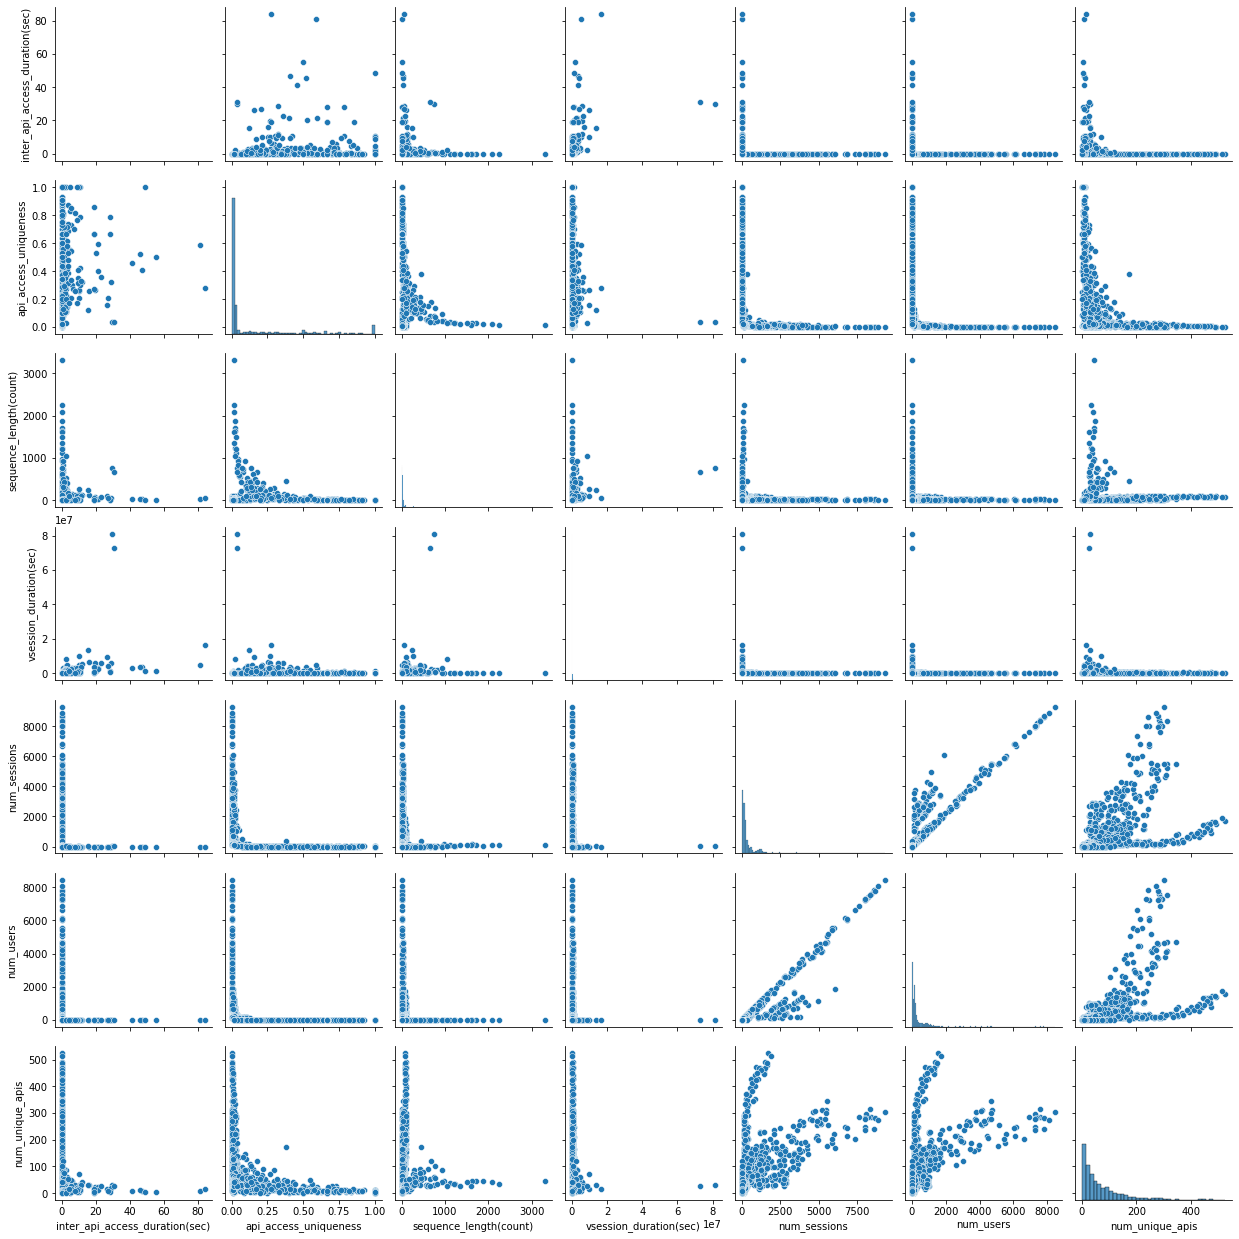

In [42]:
sns.pairplot(data=df_sup_num)

## Detección de Anomalías

### One-Class Support Vector Machine

In [18]:
# importar el modulo desde scikit learn
from sklearn.svm import OneClassSVM

In [19]:
# ajustar el hiperparametro
clf = OneClassSVM(nu=0.15, kernel='rbf')

In [20]:
# predicciones de los outliers
# el método regresa 1 para no outliers y -1 para outliers
y_outlier = clf.fit_predict(df_sup_num)

In [21]:
y_outlier.shape

(1534,)

In [22]:
np.unique(y_outlier, return_counts=True)

(array([-1,  1]), array([ 231, 1303]))

In [23]:
# agregar la columna con las predicciones a nuevo dataframe, codificadas como outlier, normal
df_pred = df_sup_num.copy()
df_pred['y_outlier'] = np.where(y_outlier > 0, 'normal', 'outlier')
df_pred['y_outlier'] = df_pred['y_outlier'].astype('category')

In [24]:
df_pred.head()

inter_api_access_duration(sec)  api_access_uniqueness  \
0                        0.000812               0.004066   
1                        0.000063               0.002211   
2                        0.004481               0.015324   
3                        0.017837               0.014974   
4                        0.000797               0.006056   

   sequence_length(count)  vsession_duration(sec)  num_sessions  num_users  \
0               85.643243                  324300        1460.0     1295.0   
1               16.166805                   31140        9299.0     8447.0   
2               99.573276                  372660         255.0      232.0   
3               69.792793                  497520         195.0      111.0   
4               14.952756                   10920         272.0      254.0   

   num_unique_apis y_outlier  
0            451.0    normal  
1            302.0    normal  
2            354.0    normal  
3            116.0    normal  
4             23.0    normal

### Graficación de los outliers

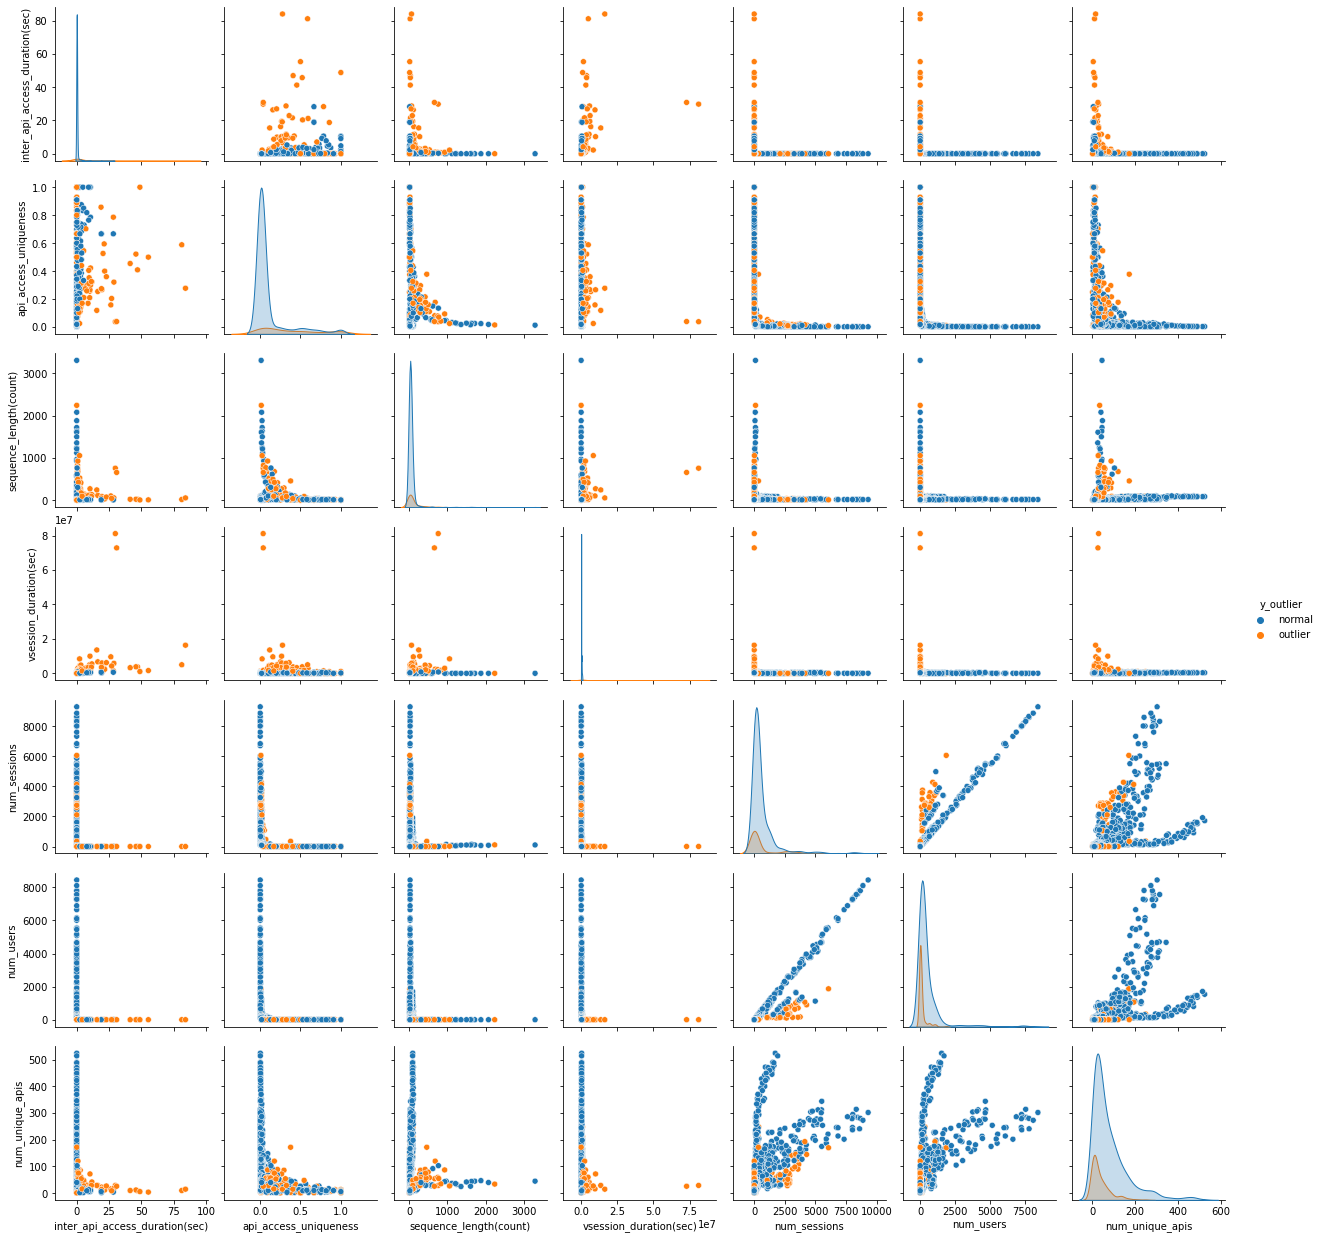

In [25]:
sns.pairplot(data=df_pred, hue = 'y_outlier')

In [26]:
df_pred.dtypes

inter_api_access_duration(sec)     float64
api_access_uniqueness              float64
sequence_length(count)             float64
vsession_duration(sec)               int64
num_sessions                       float64
num_users                          float64
num_unique_apis                    float64
y_outlier                         category
dtype: object

### Considerando solamente 4 características en el ajuste del One-Class SVM

- **inter_api_access_duration(sec):** Intervalo de tiempo entre dos accesos consecutivos a la API en una sesión de usuario.
- **sequence_length(count):** El número total de llamadas a API hechas en una sesión por una usuario en promedio.

- **num_sessions:** Número de sesiones de usuario cada una con diferente session_id.
- **num_users:** Número de usuarios generando el mismo tipo de secuencias de llamadas de API.


#### El dataframe

In [27]:
# dataframe con las 4 características
df_subset = df_sup_num.copy()
df_subset = df_subset[['num_users','num_sessions', 'sequence_length(count)', 'inter_api_access_duration(sec)']]
#df_subset = df_subset[['num_users','num_sessions', 'inter_api_access_duration(sec)']]
#df_subset = df_subset[['num_users','num_sessions']]
df_subset.head()

num_users  num_sessions  sequence_length(count)  \
0     1295.0        1460.0               85.643243   
1     8447.0        9299.0               16.166805   
2      232.0         255.0               99.573276   
3      111.0         195.0               69.792793   
4      254.0         272.0               14.952756   

   inter_api_access_duration(sec)  
0                        0.000812  
1                        0.000063  
2                        0.004481  
3                        0.017837  
4                        0.000797

In [28]:
# ajustar el hiperparametro
clf = OneClassSVM(nu=0.15, kernel='rbf')
# predicciones de los outliers
# el método regresa 1 para no outliers y -1 para outliers
y_outlier = clf.fit_predict(df_subset)

In [29]:
y_outlier.shape

(1534,)

In [30]:
np.unique(y_outlier, return_counts=True)

(array([-1,  1]), array([ 232, 1302]))

In [31]:
# agregar la columna con las predicciones a nuevo dataframe, codificadas como outlier, normal
df_pred = df_sup_num.copy()
df_pred['y_outlier'] = np.where(y_outlier > 0, 'normal', 'outlier')
df_pred['y_outlier'] = df_pred['y_outlier'].astype('category')

In [32]:
df_pred.head()

inter_api_access_duration(sec)  api_access_uniqueness  \
0                        0.000812               0.004066   
1                        0.000063               0.002211   
2                        0.004481               0.015324   
3                        0.017837               0.014974   
4                        0.000797               0.006056   

   sequence_length(count)  vsession_duration(sec)  num_sessions  num_users  \
0               85.643243                  324300        1460.0     1295.0   
1               16.166805                   31140        9299.0     8447.0   
2               99.573276                  372660         255.0      232.0   
3               69.792793                  497520         195.0      111.0   
4               14.952756                   10920         272.0      254.0   

   num_unique_apis y_outlier  
0            451.0   outlier  
1            302.0   outlier  
2            354.0    normal  
3            116.0    normal  
4             23.0    normal

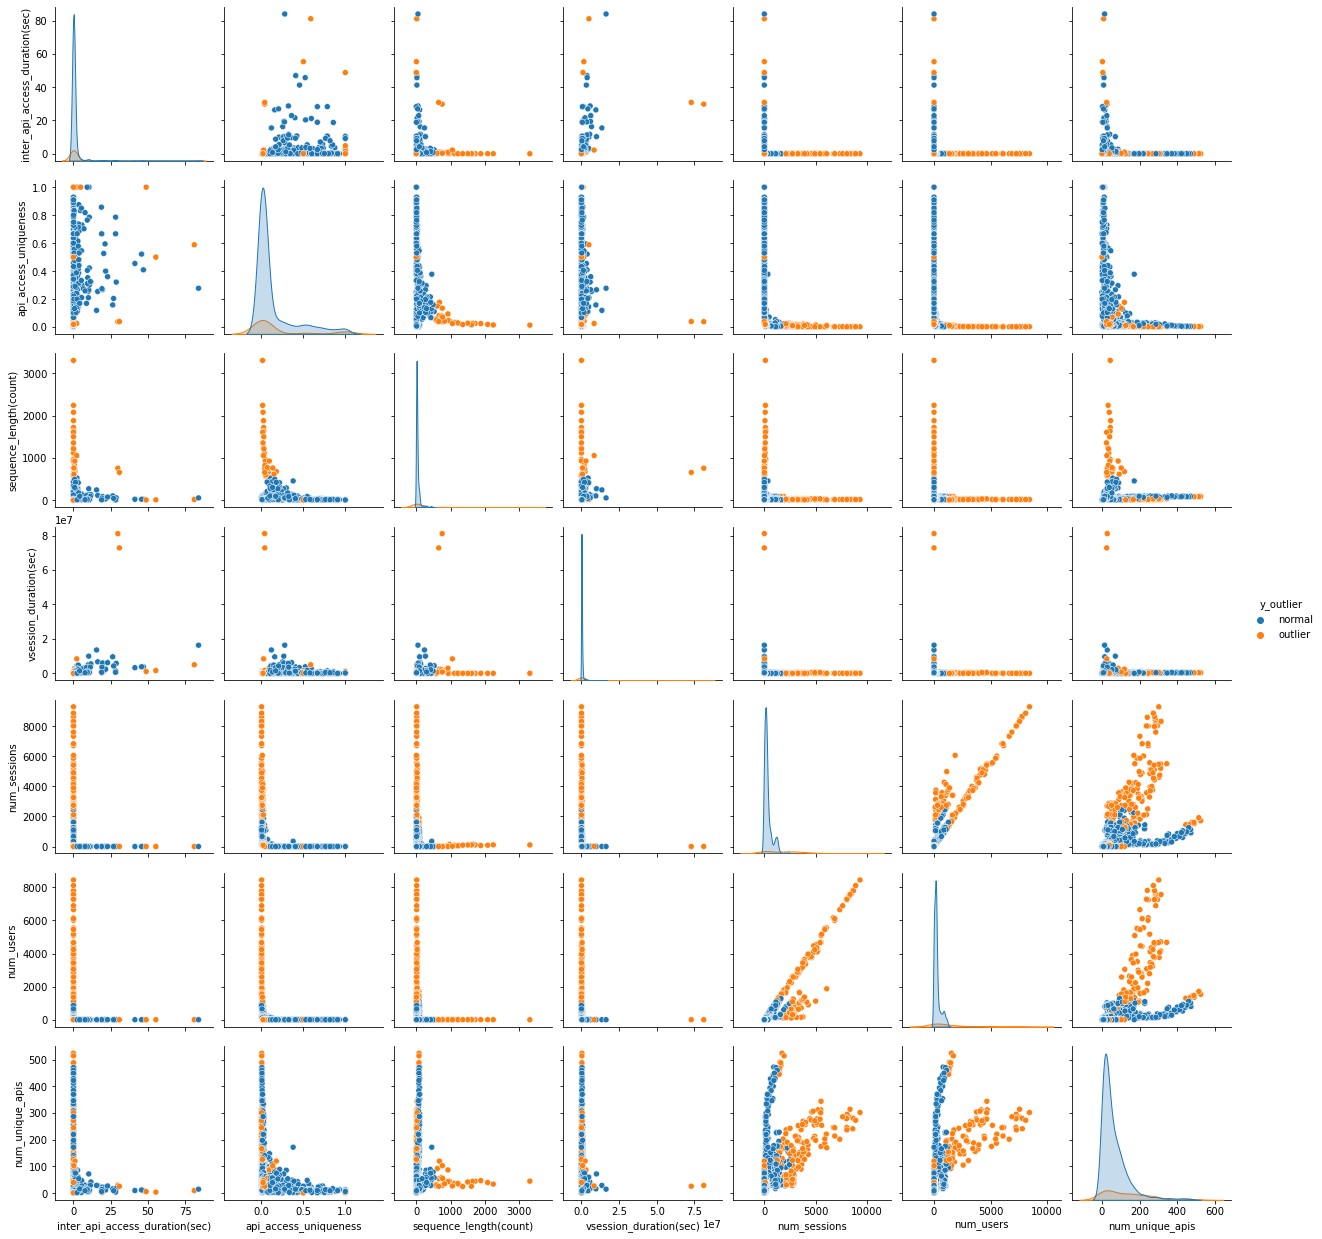

In [33]:
sns.pairplot(data=df_pred, hue = 'y_outlier')

### Considerando solamente 2 características en el ajuste del One-Class SVM

- **num_sessions:** Número de sesiones de usuario cada una con diferente session_id.
- **num_users:** Número de usuarios generando el mismo tipo de secuencias de llamadas de API.

In [34]:
# dataframe con las 4 características
df_subset = df_sup_num.copy()
df_subset = df_subset[['num_users','num_sessions']]
df_subset.head()

# ajustar el hiperparametro
clf = OneClassSVM(nu=0.15, kernel='rbf')
# predicciones de los outliers
# el método regresa 1 para no outliers y -1 para outliers
y_outlier = clf.fit_predict(df_subset)

In [35]:
y_outlier.shape

(1534,)

In [36]:
np.unique(y_outlier, return_counts=True)

(array([-1,  1]), array([ 164, 1370]))

In [37]:
# agregar la columna con las predicciones a nuevo dataframe, codificadas como outlier, normal
df_pred = df_sup_num.copy()
df_pred['y_outlier'] = np.where(y_outlier > 0, 'normal', 'outlier')
df_pred['y_outlier'] = df_pred['y_outlier'].astype('category')

df_pred.head()

inter_api_access_duration(sec)  api_access_uniqueness  \
0                        0.000812               0.004066   
1                        0.000063               0.002211   
2                        0.004481               0.015324   
3                        0.017837               0.014974   
4                        0.000797               0.006056   

   sequence_length(count)  vsession_duration(sec)  num_sessions  num_users  \
0               85.643243                  324300        1460.0     1295.0   
1               16.166805                   31140        9299.0     8447.0   
2               99.573276                  372660         255.0      232.0   
3               69.792793                  497520         195.0      111.0   
4               14.952756                   10920         272.0      254.0   

   num_unique_apis y_outlier  
0            451.0   outlier  
1            302.0   outlier  
2            354.0    normal  
3            116.0    normal  
4             23.0    normal

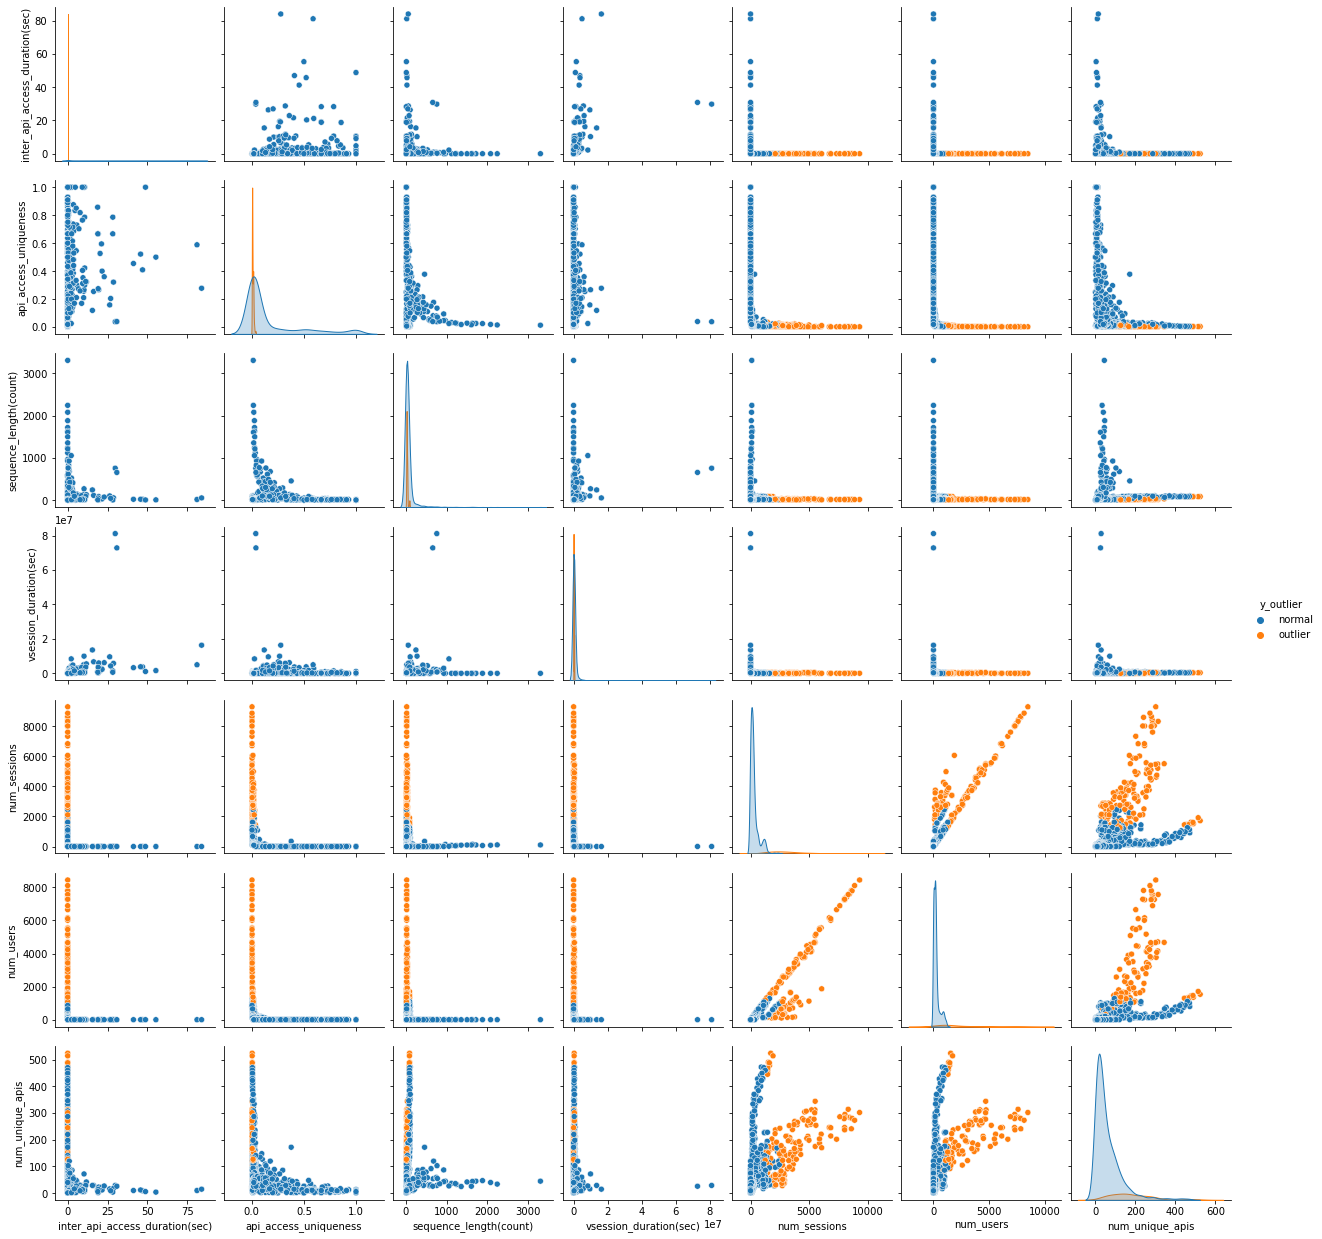

In [40]:
sns.pairplot(data=df_pred, hue = 'y_outlier')

## Conclusiones
como es de esperarse, al aplicar el método OC-SVM a las 7 variables numéricas, podemos ver que en todas las gráficas de pares se encuentran outliers. Mientras que se van considerando menos variables para la filtración de los outliers, se encuentran menos.

En este caso se fijo el parámetro ```nu = 0.15```  para considerar la misma proporción de outliers en los 3 casos.  

Considerando solo las variables de número de sesiones y número de usuarios vemos que se quedan algunas gráficas de pares sin filrar datos outliers.

El caso equilibrado parece ser considerar las variables de tiempo junto con las de sesiones, que son las siguientes

- **inter_api_access_duration(sec)** 
- **sequence_length(count)**
- **num_sessions** 
- **num_users** 

Parece filtrar bien como se observa en las gráficas de número de sesion y número de usuario contra el número de llamads únicas a la API, dejando un comportamiento que se ajustaría bien con una regresión lineal. 

Por otro lado, para la gráfica de número de usuarios contra número de sesiones parece filtrar excesivamente y romper la tendencia de linealidad que se observa.